In [1]:
from models.ESN.esn_model import ESNModel
import os
import pandas as pd

ROOT_PATH = os.path.pardir
SUNSPOTS_PATH = os.path.join(ROOT_PATH, "datasets/Sunspots.csv")

c:\Users\piotr\Workspaces\timeseries-models\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
MyESN_100_30 = ESNModel(
    dataset=pd.read_csv("../datasets/Sunspots.csv"),
    n_steps_in=100,
    n_steps_out=30,
    test_frac=0.1,
    metric=None,
)

In [3]:
params = MyESN_100_30.tune()


[I 2023-05-22 11:31:59,464] A new study created in memory with name: no-name-75793995-1934-4b26-80cf-ecd13f285cf1
[I 2023-05-22 11:32:01,175] Trial 0 finished with value: 34.040203706220744 and parameters: {'density': 0.12618244744293017, 'spectral_radius': 1.214810947901812, 'noise_magnitude': 0.08137940367728273, 'hidden_size': 441}. Best is trial 0 with value: 34.040203706220744.
[I 2023-05-22 11:32:03,692] Trial 1 finished with value: 70.82989708383248 and parameters: {'density': 0.08937641149079767, 'spectral_radius': 0.8013512447643965, 'noise_magnitude': 0.008231278980342238, 'hidden_size': 607}. Best is trial 0 with value: 34.040203706220744.
[I 2023-05-22 11:32:04,964] Trial 2 finished with value: 42.809621111436186 and parameters: {'density': 0.7304124985563942, 'spectral_radius': 0.7483549441094387, 'noise_magnitude': 0.06437317638453707, 'hidden_size': 258}. Best is trial 0 with value: 34.040203706220744.
[I 2023-05-22 11:32:06,328] Trial 3 finished with value: 59.603797343

In [4]:
MyESN_100_30.fit(*params)


94


In [5]:
# Autoregressive forecast, as far as test dataset
forecast_autoregressive = MyESN_100_30.predict(-1, autoreggressive=True)



In [6]:
# Windowed forecast with shift, 25 ahead
forecast = MyESN_100_30.predict(25, autoreggressive=False, shift=40)

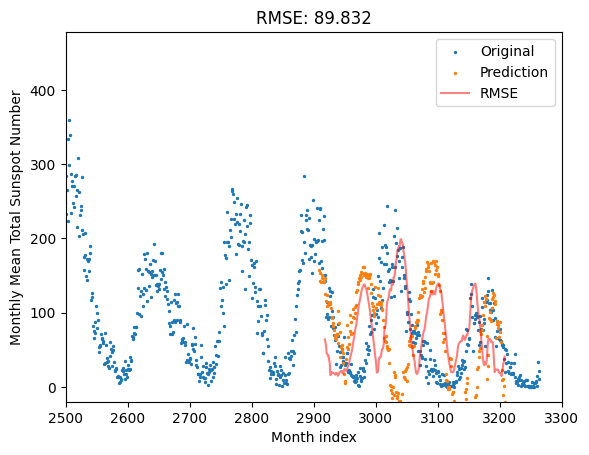

In [7]:
# Autoregressive forecast
MyESN_100_30.plotter.plot_forecast(forecast_autoregressive, xlim=(2500, 3300))

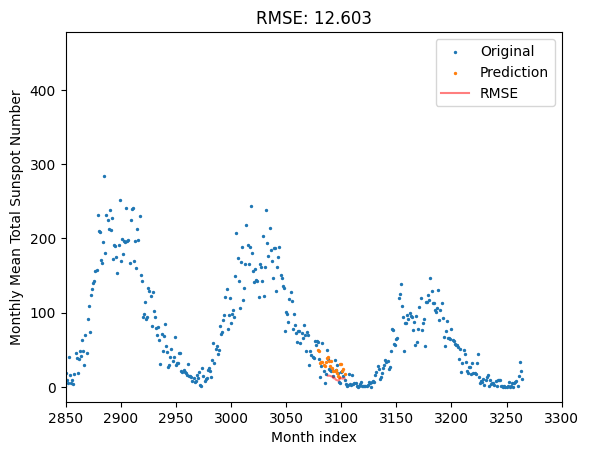

In [8]:
# Windowed forecast
MyESN_100_30.plotter.plot_forecast(forecast, xlim=(2850, 3300))

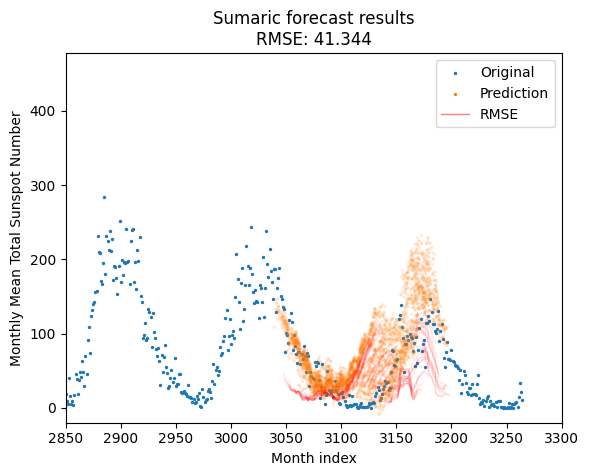

In [9]:
# Cumulative plot for windowed forecast
MyESN_100_30.plotter.plot_forecasts(MyESN_100_30.forecasts, xlim=(2850, 3300))

In [10]:
MyESN_50_1 = ESNModel(
    dataset=pd.read_csv("../datasets/Sunspots.csv"),
    n_steps_in=50,
    n_steps_out=1,
    test_frac=0.1,
    metric=None,
)

In [11]:
params = MyESN_50_1.tune()

[I 2023-05-22 11:36:31,894] A new study created in memory with name: no-name-dd99e2d7-325e-4ee4-b1d0-148c2c5ab72e
[I 2023-05-22 11:36:35,486] Trial 0 finished with value: 17.731171153029454 and parameters: {'density': 0.42969867543539797, 'spectral_radius': 0.5725961821144948, 'noise_magnitude': 0.06939025222742896, 'hidden_size': 718}. Best is trial 0 with value: 17.731171153029454.
[I 2023-05-22 11:36:37,013] Trial 1 finished with value: 34.36549217623861 and parameters: {'density': 0.5960302626573832, 'spectral_radius': 0.8360355772341989, 'noise_magnitude': 0.04202362602157094, 'hidden_size': 297}. Best is trial 0 with value: 17.731171153029454.
[I 2023-05-22 11:36:42,924] Trial 2 finished with value: 80.3964579744119 and parameters: {'density': 0.0036315875937286135, 'spectral_radius': 0.8424502721195692, 'noise_magnitude': 0.03438027926071637, 'hidden_size': 893}. Best is trial 0 with value: 17.731171153029454.
[I 2023-05-22 11:36:45,625] Trial 3 finished with value: 82.265110184

In [12]:
MyESN_50_1.fit(*params)

676


In [13]:
forecast_autoregressive = MyESN_50_1.predict(-1, autoreggressive=True)

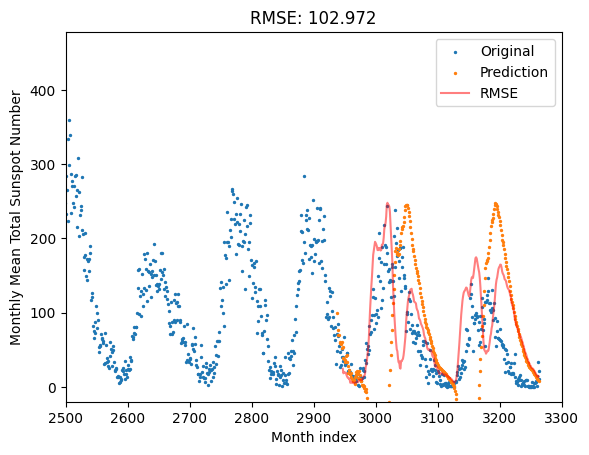

In [14]:
MyESN_50_1.plotter.plot_forecast(forecast_autoregressive, xlim=(2500, 3300))

[I 2023-05-22 11:39:46,982] A new study created in memory with name: no-name-9a8f2c88-7cd6-44d0-85ab-1702a9345ac6
[I 2023-05-22 11:39:52,754] Trial 0 finished with value: 17.60339375449484 and parameters: {'density': 0.2044829305815299, 'spectral_radius': 0.7004780721975037, 'noise_magnitude': 0.002851870715026994, 'hidden_size': 871}. Best is trial 0 with value: 17.60339375449484.
[I 2023-05-22 11:39:57,243] Trial 1 finished with value: 16.751037765840056 and parameters: {'density': 0.3838401606172065, 'spectral_radius': 0.5666178076859064, 'noise_magnitude': 0.027553780454566124, 'hidden_size': 798}. Best is trial 1 with value: 16.751037765840056.
[I 2023-05-22 11:39:59,904] Trial 2 finished with value: 17.50613495692669 and parameters: {'density': 0.4802283682818359, 'spectral_radius': 1.4915194944625325, 'noise_magnitude': 0.06987363124337312, 'hidden_size': 587}. Best is trial 1 with value: 16.751037765840056.
[I 2023-05-22 11:40:02,320] Trial 3 finished with value: 16.27306387749

614


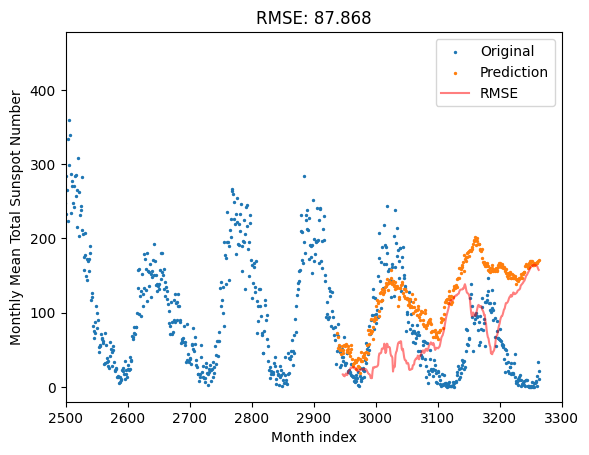

In [19]:
MyESN_400_1 = ESNModel(
    dataset=pd.read_csv("../datasets/Sunspots.csv"),
    n_steps_in=300,
    n_steps_out=1,
    test_frac=0.1,
    metric=None,
)
params = MyESN_400_1.tune()
MyESN_400_1.fit(*params)
forecast_autoregressive = MyESN_400_1.predict(-1, autoreggressive=True)
MyESN_400_1.plotter.plot_forecast(forecast_autoregressive, xlim=(2500, 3300))